### Introduction to computer vision, context mainly adopted from 'introduction to computer vision' course on Udacity. Python & Opencv is used in this series of tutorials. 
[source code on GitHub](https://github.com/Max1993Liu/Computer_Vision)

## SIFT:
The idea of SIFT is to find the keypoints in the image and **define a descriptor that is scale invariant**.
[Implementation detail](http://docs.opencv.org/trunk/da/df5/tutorial_py_sift_intro.html)

In [5]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

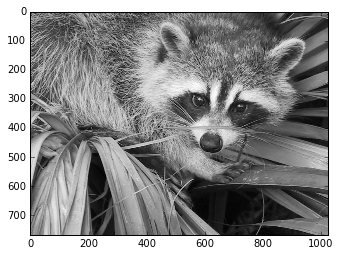

In [3]:
face = misc.face(gray=True)
plt.imshow(face, cmap=plt.cm.gray)

In [14]:
sift = cv2.xfeatures2d.SIFT_create()
kp, desc = sift.detectAndCompute(face, None)
#kp => keypoints, desc => descriptor
print 'We got {} keypoints in the image, each keypoint is represented by a {} vector'.format(*desc.shape)

We got 12374 keypoints in the image, each keypoint is represented by a 128 vector


### Let's see where the keypoints are

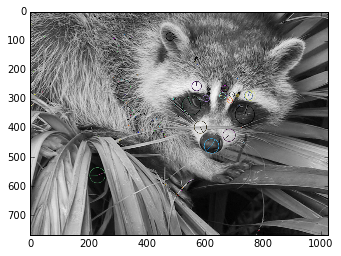

In [31]:
#for the purpose of clear plotting, we pick the top 150 features
sift = cv2.xfeatures2d.SIFT_create(nfeatures=150)
kp, desc = sift.detectAndCompute(face, None)

#draw key points
face = cv2.drawKeypoints(face, kp, color=0.5,outImage=face,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(face, cmap=plt.cm.gray)

### You can see most of the features appear to be on the face area. There're also other feature extraction methods such as SURF, which stands for speeded-up Robust Features. The use of SURF is very similar to SIFT in opencv.

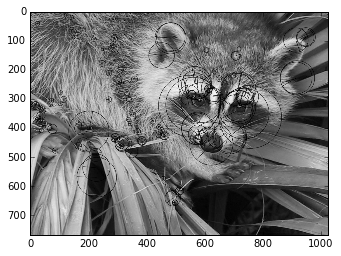

In [40]:
face = misc.face(gray=True)
surf = cv2.xfeatures2d.SURF_create(5000)
kp, desc = surf.detectAndCompute(face, None)

#draw key points
face = cv2.drawKeypoints(face, kp, color=0.5,outImage=face,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(face, cmap=plt.cm.gray)

### Another method that you can play around with is ORB, which is also available in opencv

In [47]:
face = misc.face(gray=True)

orb = cv2.ORB_create()
kp = orb.detect(face, None)
kp, desc = orb.compute(face, kp)
#There's some issues with python binding of opencv in ORB detection
#I'm constantly getting errors on this one.
#Hopefully it's fixed now.